In [50]:
import tensorflow as tf


In [51]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test= X_train/255.0, X_test/255.0
print(X_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [67]:
# Build the model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(128, activation = 'relu'),
         tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = 'relu')
    ]
)

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

In [69]:
# compile the model

from keras.optimizers import Adam

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate = 1e-3),
    metrics = ['accuracy']
)

In [70]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [71]:
r = model.fit(
    X_train, y_train,
    epochs =100,
    validation_data =(X_test, y_test),
    callbacks = [early_stopping]
)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3231 - accuracy: 0.9031 - val_loss: 0.1339 - val_accuracy: 0.9597
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1470 - accuracy: 0.9553 - val_loss: 0.0969 - val_accuracy: 0.9696
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1168 - accuracy: 0.9646 - val_loss: 0.0848 - val_accuracy: 0.9755
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.0779 - val_accuracy: 0.9757
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0735 - val_accuracy: 0.9784
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0779 - accuracy: 0.9756 - val_loss: 0.0775 - val_accuracy: 0.9781
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0728 - accuracy: 0.9763 - val_loss: 0.0724 - val_ac

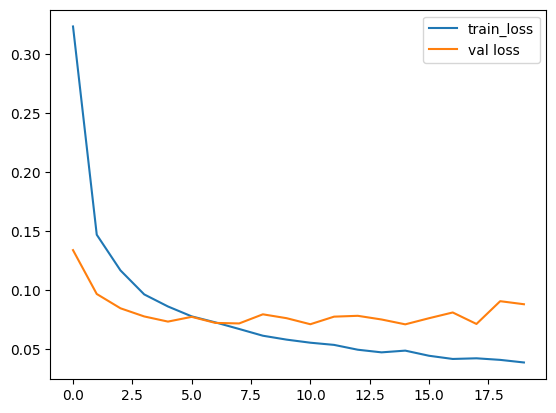

In [72]:
# Plot loss per iteration
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()



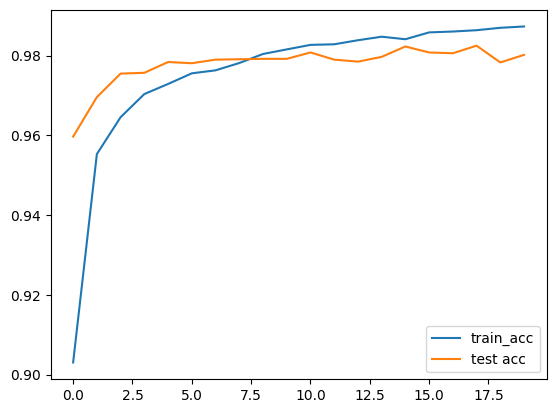

In [73]:

# Plot acc per iteration
plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'], label = 'test acc')
plt.legend()

In [74]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [75]:
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


In [76]:
# Metrics for training dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
train_classification_rep = classification_report(y_train, y_train_pred)
train_confusion_mtx = confusion_matrix(y_train, y_train_pred)

# Metrics for test dataset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
test_classification_rep = classification_report(y_test, y_test_pred)
test_confusion_mtx = confusion_matrix(y_test, y_test_pred)


In [77]:
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training Classification Report:\n", train_classification_rep)
print("Training Confusion Matrix:\n", train_confusion_mtx)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test Classification Report:\n", test_classification_rep)
print("Test Confusion Matrix:\n", test_confusion_mtx)


Training Accuracy: 0.9959833333333333
Training Precision: 0.9959856897836048
Training Recall: 0.9959833333333333
Training F1 Score: 0.9959813907898014
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      1.00      5958
           3       1.00      0.99      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       0.99      1.00      1.00      6265
           8       1.00      0.99      0.99      5851
           9       1.00      0.99      0.99      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Training Confusion Matrix:
 [[5914    3    0    0    0   

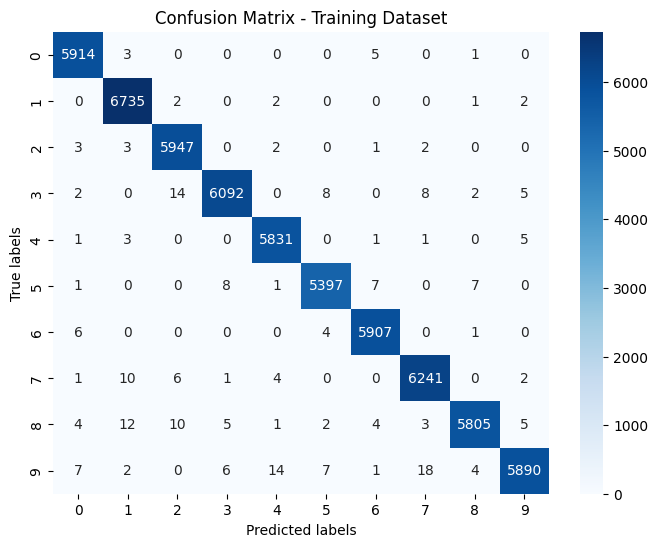

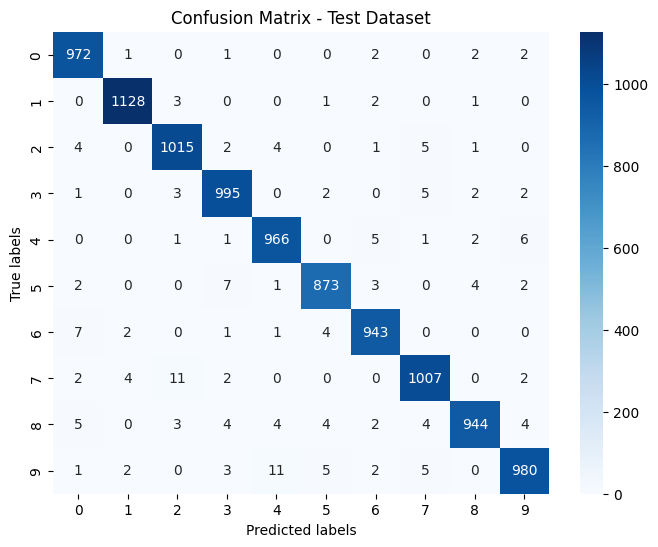

In [78]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion_mtx, labels=np.arange(10), title='Confusion Matrix - Training Dataset')

# Plot confusion matrix for test dataset
plot_confusion_matrix(test_confusion_mtx, labels=np.arange(10), title='Confusion Matrix - Test Dataset')


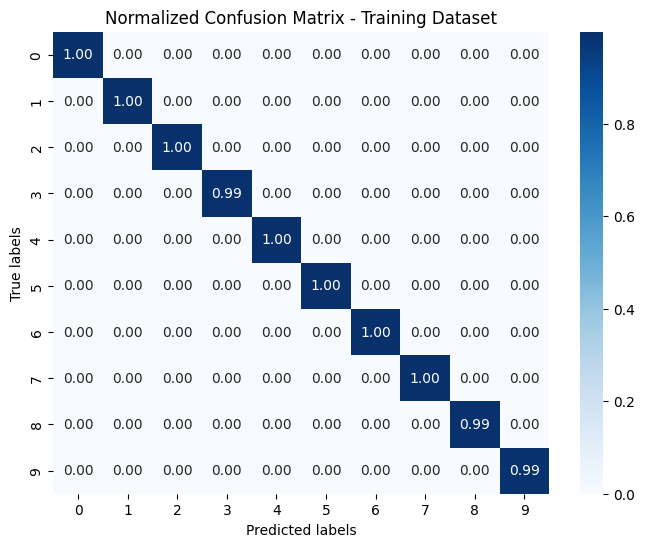

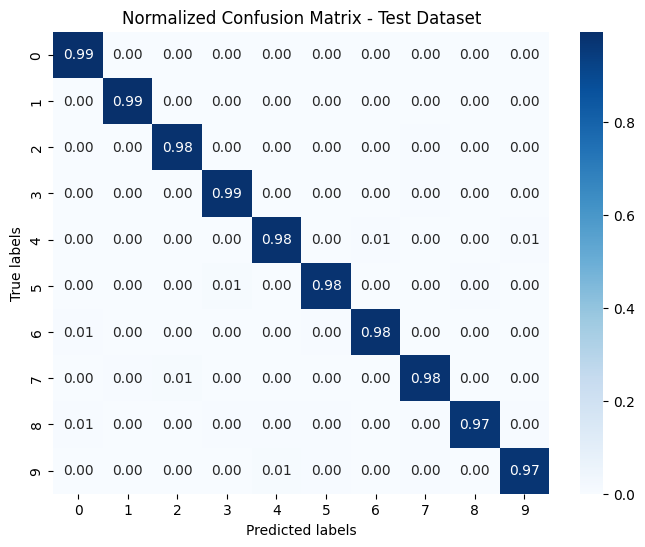

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot normalized confusion matrix
def plot_normalized_confusion_matrix(cm, labels, title):
    # Calculate normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Assuming train_confusion_mtx and test_confusion_mtx are already computed confusion matrices

# Plot normalized confusion matrix for training dataset
plot_normalized_confusion_matrix(train_confusion_mtx, labels=np.arange(10), title='Normalized Confusion Matrix - Training Dataset')

# Plot normalized confusion matrix for test dataset
plot_normalized_confusion_matrix(test_confusion_mtx, labels=np.arange(10), title='Normalized Confusion Matrix - Test Dataset')


In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


313/313 [==============================] - 1s 2ms/step


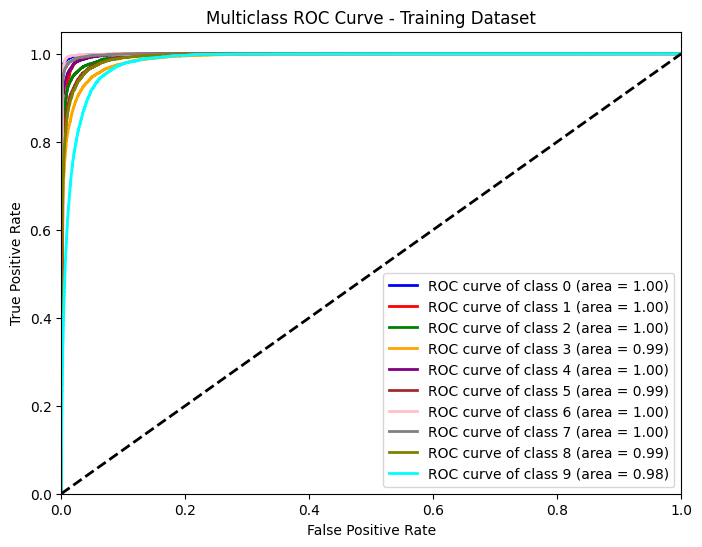

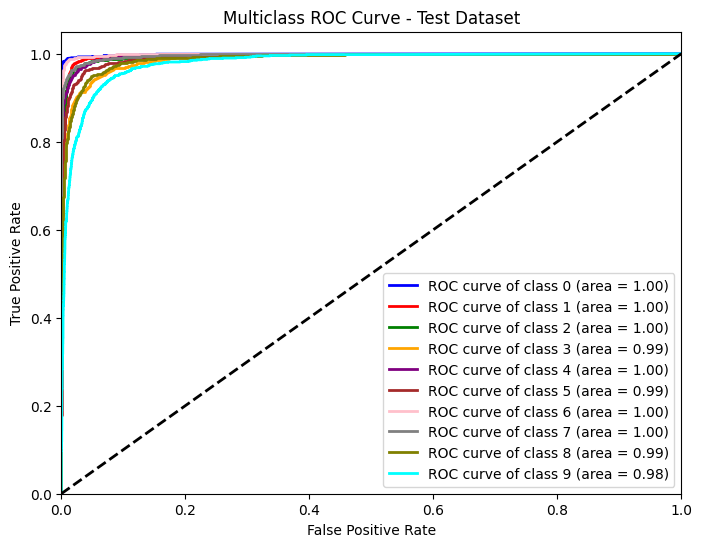

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert labels to one-hot encoded format
y_train_one_hot = label_binarize(y_train, classes=np.arange(10))
y_test_one_hot = label_binarize(y_test, classes=np.arange(10))

# Function to plot multiclass ROC curves
def plot_multiclass_roc_curve(y_true, y_pred_probs, n_classes, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Assuming you have model.predict_proba() available for probability scores

# Calculate predicted probabilities for training dataset
y_train_pred_probs = model.predict(X_train)

# Calculate predicted probabilities for test dataset
y_test_pred_probs = model.predict(X_test)

# Plot multiclass ROC curves for training dataset
plot_multiclass_roc_curve(y_train_one_hot, y_train_pred_probs, n_classes=10, title='Multiclass ROC Curve - Training Dataset')

# Plot multiclass ROC curves for test dataset
plot_multiclass_roc_curve(y_test_one_hot, y_test_pred_probs, n_classes=10, title='Multiclass ROC Curve - Test Dataset')


313/313 [==============================] - 1s 2ms/step


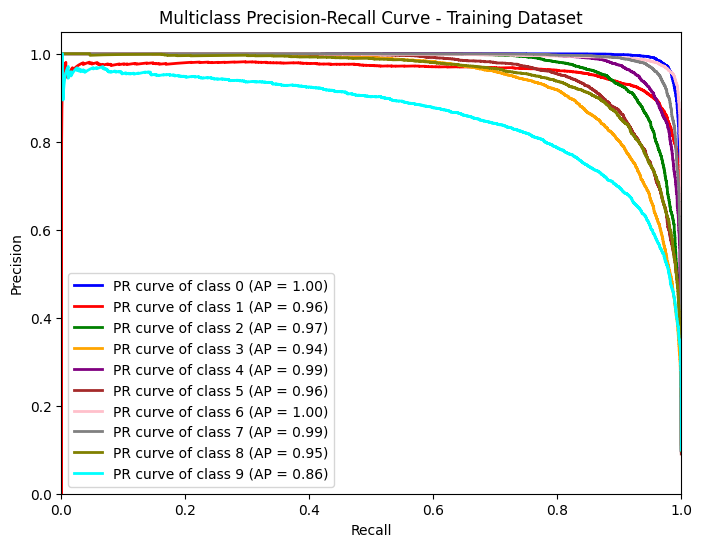

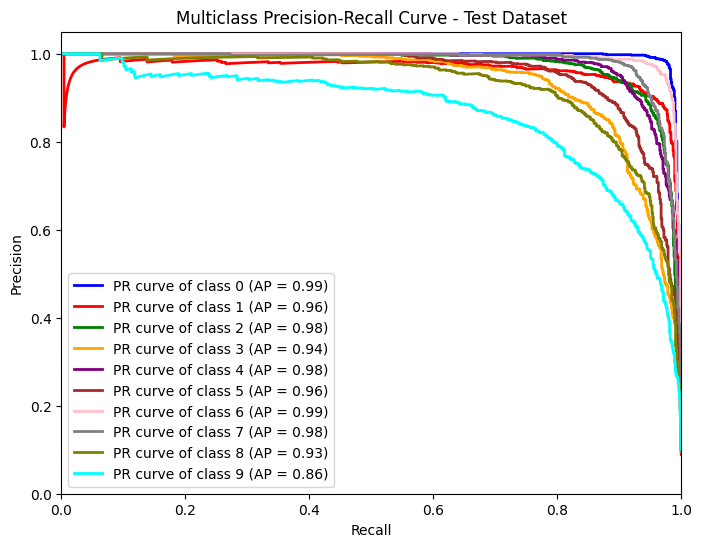

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_multiclass_precision_recall_curve(y_true, y_pred_probs, n_classes, title):
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_pred_probs[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], y_pred_probs[:, i])

    # Plot Precision-Recall curves for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='PR curve of class {0} (AP = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Assuming you have model.predict_proba() available for probability scores

# Calculate predicted probabilities for training dataset
y_train_pred_probs = model.predict(X_train)

# Calculate predicted probabilities for test dataset
y_test_pred_probs = model.predict(X_test)

# Plot multiclass Precision-Recall curves for training dataset
plot_multiclass_precision_recall_curve(y_train_one_hot, y_train_pred_probs, n_classes=10, title='Multiclass Precision-Recall Curve - Training Dataset')

# Plot multiclass Precision-Recall curves for test dataset
plot_multiclass_precision_recall_curve(y_test_one_hot, y_test_pred_probs, n_classes=10, title='Multiclass Precision-Recall Curve - Test Dataset')
